## Environment setup

### Library preparation

In [3]:
%matplotlib notebook
%load_ext autoreload
%autoreload 2

In [4]:
from si_prefix import si_format
from tqdm import tqdm, tqdm_notebook

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import qcodes as qc
# from qcodes import Station, load_by_run_spec, load_by_guid
# from qcodes.instrument.base import Instrument
# from qcodes.dataset.experiment_container import (Experiment,
#                                                  load_last_experiment,
#                                                  new_experiment)
# from qcodes.dataset.database import initialise_database
# from qcodes.dataset.measurements import Measurement
# from qcodes.dataset.plotting import plot_by_id, get_data_by_id, plot_dataset
# from qcodes.dataset.data_set import load_by_id
# # from qcodes.dataset.data_export import get_shaped_data_by_runidb

In [5]:
from qcodes.instrument_drivers.Lakeshore.Model_372 import Model_372
from qcodes.instrument_drivers.tektronix.AWG3252_Isrc import AWG3252_Isrc
from qcodes.instrument_drivers.HP.HP34401 import HP34401
from qcodes.instrument_drivers.HP.HP34401_DL1201 import HP34401_DL1201
from qcodes.instrument_drivers.Keithley.Keithley_2600_channels import *
from qcodes.instrument_drivers.tektronix.AWG5204_Isrc import AWG5204_Isrc

from qcodes.instrument_drivers.Keysight.Keysight_B2962A_Isrc import B2962A_Isrc


from qcodes.instrument_drivers.Keithley.Keithley_6220 import Keithley_6220
from qcodes.instrument_drivers.Keithley.Keithley_6220_Isrc import Keithley_6220_Isrc

In [6]:
import sys 
sys.path.append('..\..\_jjtools')

# from Exps import *

from JJ_data_processing import read_opj_data, pbi, bpbi, show_df, update_df

from JJformulas import *
# from meas_util import *

from JJmeasurement import *

C:\Users\KelvinOX25\Anaconda3\lib\site-packages\qcodes\dataset\database.py:13: UserWarning: The module `qcodes.dataset.database` is deprecated.
Public features are available at the import of `qcodes`.
Private features are available in `qcodes.dataset.sqlite.*` modules.
  warnings.warn('The module `qcodes.dataset.database` is deprecated.\n'
C:\Users\KelvinOX25\Anaconda3\lib\site-packages\tqdm\autonotebook.py:17: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  " (e.g. in jupyter console)", TqdmExperimentalWarning)


### Instrument nicknames and QC database initialization

In [7]:
try:
   Instrument.close_all()
except KeyError:
   pass    
except NameError:
   pass 

K2602 =  Keithley_2600(name = 'K2602', address = "GPIB::26::INSTR" )
Flux_chA = K2602.smua.curr
Flux_chB = K2602.smub.curr

Bfield =  Flux_chA
Bfield.step = 10e-6
Bfield.inter_delay = .1



# Isrc = AWG5204_Isrc('gen', 'TCPIP0::AWG52000-XXXX::inst0::INSTR', ch = 1, R_bias = 1e9, Attn = 1, timeout = 20)


# Isrc = Keithley_6220(name = 'K6220', address = "GPIB::13::INSTR" )
# Isrc.set_R_Attn ( R_bias = 1, Attn = 1 )




# Isrc = AWG3252_Isrc('gen', 'TCPIP0::192.168.13.32::inst0::INSTR', 
#                     R_bias = 1e9, Attn = 10)
# Isrc.init()

Vmeter = HP34401_DL1201('meter', 'GPIB0::8::INSTR', Gain = 1e2)
Vmeter.init('fast 6')


# Isrc = Keithley_6220_Isrc(name = 'K6220', address = "GPIB::13::INSTR",
#                           Rsh = 10e6, Rb = 1e9, Vmeter = Vmeter)


Isrc = Keithley_6220_Isrc(name = 'K6220', address = "GPIB::13::INSTR",
                          Rsh = 10.041e3, Rb = 2.2e6, Vmeter = Vmeter)


station = qc.Station(Isrc, Vmeter)

print ('Instrument initialization completed.')

Connected to: Keithley Instruments Inc. 2602A (serial:1272049, firmware:2.1.5) in 0.12s


[K6220(Keithley_6220_Isrc)] Snapshot: Could not update parameter: Irange


Instrument initialization completed.


In [8]:

LS370 = Model_372(name = 'LS370 input Ch', address = 'GPIB::12::INSTR', terminator='\n')
T8 = LS370.ch08.temperature

htr = LS370.sample_heater
htr_setpt = htr.setpoint

htr_setpt.set(0.020)
htr.P.set(30)
htr.I.set(5)
htr.D.set(1)
# PIDset(30,5,1)
htr.output_range('3.16mA')

Connected to: LSCI 370 (serial:370665, firmware:04102008) in 0.11s


### Class JJmeas

In [9]:
tools = {'I' : Isrc.I,
         'V' : Vmeter.V,
         'B' : Flux_chA,
         'T': T8,
         'htr' : htr_setpt}

In [48]:
def setup():
    Isrc.I.set(0)
#     pass

def cleanup():
    Isrc.I.set(0) 
#     Bfield.set(0)



In [747]:
# jj = JJmeas(sample = 'D070B1N1v1', tools = tools)
# jj.setup = setup
# jj.cleanup = cleanup

jj.ZF   = -2e-3
jj.FF   = 0.200e-3

In [49]:
jj1 = JJmeas(sample = 'D070B1N1v1', tools = tools)
jj1.setup = setup
jj1.cleanup = cleanup


jj5 = JJmeas(sample = 'D070B1N5v1', tools = tools)
jj5.setup = setup
jj5.cleanup = cleanup
jj5.ZF   = -2e-6
jj5.FF   = 220e-6

jj0 = JJmeas(sample = 'D070B1N0v1', tools = tools)
jj0.setup = setup
jj0.cleanup = cleanup
jj0.ZF   = -2e-6
jj0.FF   = 220e-6

In [704]:
# jj = JJmeas(sample = 'D078N5v1', tools = tools)
# jj.setup = setup
# jj.cleanup = cleanup

In [541]:
jj.tool_status(['B', 'I'])

{'B': '-93.0 µA', 'I': '-338.3 fA'}

In [186]:
#values without extra shield

# jj.ZF   = -0.093e-3
# jj.FF   = 0.130e-3

## Measurement

In [542]:
tools['I'].set(1e-10)

In [543]:
tools['I'].get()

9.904516115311889e-11

#### Iscr choise

In [544]:
Isrc.ask_raw('SOUR:CURR:RANG?')

'2.000000E-07\n'

In [1]:
Isrc.write_raw('SOUR:CURR:RANG 1e-7')
Isrc.I.set(0.0e-9)

NameError: name 'Isrc' is not defined

In [602]:
Isrc.I.set(0e-9)

#### Vmeter regime

In [18]:
Vmeter.init('fast 6')

In [152]:
jj.meas_Voffset(0)

5.9592217e-05

In [162]:
jj.tools['V'].meas_Voff()
Isrc.Vmeter.Voff

5.847299300000001e-05

In [496]:
B = jj.cos_to_B(1)

print(B*1e3)

Bfield.set(B)


-0.093


### IVCs

In [614]:
jj.stabilize_I( amp = 200e-12)

#### wide scan

In [29]:
#B = jj.cos_to_B(0)

B = 0

print(B*1e3)

Bfield.set(B)


jj1.IVC_udu (amp = 100e-9, stp = 1e-9, dt = .1,  N_avg = 1, 
            label = 'kei full ivc')

0.0


Starting experimental run with id: 797


797

#### fine scan

In [47]:
B = jj5.cos_to_B(0.25)
# B = 0e-6

print(B*1e3)

Bfield.set(B)


jj5.IVC_udu (amp = 20e-12, stp = .2e-12, dt = .1,  N_avg = 1, 
            label = 'kei gnd T = 50 cos = 0.25')

0.1842888032747062


Starting experimental run with id: 1455


An exception occured in measurement with guid: aaaaaaaa-0000-0000-0000-0173a187e513;
Traceback:
Traceback (most recent call last):
  File "..\..\_jjtools\JJmeasurement.py", line 82, in IVC_cust
    is_vs = [[I.get(),V.get()] for _ in range( N_avg)]
  File "..\..\_jjtools\JJmeasurement.py", line 82, in <listcomp>
    is_vs = [[I.get(),V.get()] for _ in range( N_avg)]
  File "C:\Users\KelvinOX25\Anaconda3\lib\site-packages\qcodes\instrument\parameter.py", line 452, in get_wrapper
    value = self.get_parser(value)
  File "C:\Users\KelvinOX25\Anaconda3\lib\site-packages\qcodes\instrument_drivers\Keithley\Keithley_6220_Isrc.py", line 91, in get_I
    v = self.Vmeter.V.get() - Voff
  File "C:\Users\KelvinOX25\Anaconda3\lib\site-packages\qcodes\instrument\parameter.py", line 448, in get_wrapper
    value = get_function(*args, **kwargs)
  File "C:\Users\KelvinOX25\Anaconda3\lib\site-packages\qcodes\utils\command.py", line 178, in __call__
    return self.exec_function(*args)
  File "C:\Users\

KeyboardInterrupt: 

In [761]:
i = np.linspace(0,10,11)
it = iter(i)

In [629]:
imin = .5e-12

i_list =   np.concatenate ([np.linspace(0    , 35e-12, 21), 
                            np.linspace(12e-12, imin, 21),
                            np.linspace(imin, 12e-12, 251),
                            np.linspace(12e-12,  0e-12, 21)]) 

jj.IVC_cust ( i_list, Ioff = 0, dt = 0.1, N_avg = 1, label = 'B=0m intermid steps')

Starting experimental run with id: 1387


An exception occured in measurement with guid: aaaaaaaa-0000-0000-0000-0173770821bc;
Traceback:
Traceback (most recent call last):
  File "..\..\_jjtools\JJmeasurement.py", line 82, in IVC_cust
    is_vs = [[I.get(),V.get()] for _ in range( N_avg)]
  File "..\..\_jjtools\JJmeasurement.py", line 82, in <listcomp>
    is_vs = [[I.get(),V.get()] for _ in range( N_avg)]
  File "C:\Users\KelvinOX25\Anaconda3\lib\site-packages\qcodes\instrument\parameter.py", line 448, in get_wrapper
    value = get_function(*args, **kwargs)
  File "C:\Users\KelvinOX25\Anaconda3\lib\site-packages\qcodes\utils\command.py", line 178, in __call__
    return self.exec_function(*args)
  File "C:\Users\KelvinOX25\Anaconda3\lib\site-packages\qcodes\utils\command.py", line 127, in call_by_str
    return self.exec_str(self.cmd_str.format(*args))
  File "C:\Users\KelvinOX25\Anaconda3\lib\site-packages\qcodes\instrument\base.py", line 759, in ask
    answer = self.ask_raw(cmd)
  File "C:\Users\KelvinOX25\Anaconda3\lib\

KeyboardInterrupt: 

### Ic meas

In [572]:
B = 0e-6
Bfield.set(B)

i_list = np.linspace(0, 200e-12, 101)

jj.IVC_cust (i_list, Vthr = 30e-6, dt = 0.1,
             N_avg = 1, label = 'Kei Ic highRb RT cos = 1')

Starting experimental run with id: 1185


1185

### Time scan

In [513]:
# Bfield.set(0e-3)
jj.time_scan ( tools['I'], dur = 30, dt= 0.1)

Starting experimental run with id: 1093



1093

In [148]:
B_list = np.linspace(0e-3, .3e-3, 51)

[            jj.time_scan ( tools['V'], dur = 1, dt= 0.01)
for jj in    jj.Bscan( B_list = B_list )]

Starting experimental run with id: 372



Starting experimental run with id: 373



Starting experimental run with id: 374



Starting experimental run with id: 375



Starting experimental run with id: 376



Starting experimental run with id: 377



Starting experimental run with id: 378



Starting experimental run with id: 379



Starting experimental run with id: 380



Starting experimental run with id: 381



Starting experimental run with id: 382



Starting experimental run with id: 383



Starting experimental run with id: 384



Starting experimental run with id: 385



Starting experimental run with id: 386



Starting experimental run with id: 387



Starting experimental run with id: 388



Starting experimental run with id: 389



Starting experimental run with id: 390



Starting experimental run with id: 391



Starting experimental run with id: 392



Starting experimental run with id: 393



Starting experimental run with id: 394



Starting experimental run with id: 395



Starting experimental run with id: 396



Starting experimental run with id: 397



Starting experimental run with id: 398



Starting experimental run with id: 399



Starting experimental run with id: 400



Starting experimental run with id: 401



Starting experimental run with id: 402



Starting experimental run with id: 403



Starting experimental run with id: 404



Starting experimental run with id: 405



Starting experimental run with id: 406



Starting experimental run with id: 407



Starting experimental run with id: 408



Starting experimental run with id: 409



Starting experimental run with id: 410



Starting experimental run with id: 411



Starting experimental run with id: 412



Starting experimental run with id: 413



Starting experimental run with id: 414



Starting experimental run with id: 415



Starting experimental run with id: 416



Starting experimental run with id: 417



Starting experimental run with id: 418



Starting experimental run with id: 419



Starting experimental run with id: 420



Starting experimental run with id: 421



Starting experimental run with id: 422




[372,
 373,
 374,
 375,
 376,
 377,
 378,
 379,
 380,
 381,
 382,
 383,
 384,
 385,
 386,
 387,
 388,
 389,
 390,
 391,
 392,
 393,
 394,
 395,
 396,
 397,
 398,
 399,
 400,
 401,
 402,
 403,
 404,
 405,
 406,
 407,
 408,
 409,
 410,
 411,
 412,
 413,
 414,
 415,
 416,
 417,
 418,
 419,
 420,
 421,
 422]

### IVC B

#### New syntaxis to try

In [777]:
# B_list = udu_list ( 4e-3, 0.2e-3)
# B_list = np.linspace(-.10e-3, 0.5e-3, 121)
B_list = [0]*500
# cos_list = np.linspace(1,0, 26)


jj = jj1
[            jj.IVC_udu (amp = 100e-12, stp = 1e-12, dt = .1,
                         N_avg = 1, label = 'repeat B = 0 ')
for jj in    jj.Bscan( B_list = B_list )]
# for jj in    jj.Bscan( cos_list = cos_list )]


Bfield.set(0)


Starting experimental run with id: 280


Starting experimental run with id: 281


Starting experimental run with id: 282


Starting experimental run with id: 283


Starting experimental run with id: 284


Starting experimental run with id: 285


Starting experimental run with id: 286


Starting experimental run with id: 287


Starting experimental run with id: 288


Starting experimental run with id: 289


Starting experimental run with id: 290


Starting experimental run with id: 291


Starting experimental run with id: 292


Starting experimental run with id: 293


Starting experimental run with id: 294


Starting experimental run with id: 295


Starting experimental run with id: 296


Starting experimental run with id: 297


Starting experimental run with id: 298


Starting experimental run with id: 299


Starting experimental run with id: 300


Starting experimental run with id: 301


Starting experimental run with id: 302


Starting experimental run with id: 303


Starting experimental run with id: 304


Starting experimental run with id: 305


Starting experimental run with id: 306


Starting experimental run with id: 307


Starting experimental run with id: 308


Starting experimental run with id: 309


Starting experimental run with id: 310


Starting experimental run with id: 311


Starting experimental run with id: 312


Starting experimental run with id: 313


Starting experimental run with id: 314


Starting experimental run with id: 315


Starting experimental run with id: 316


Starting experimental run with id: 317


Starting experimental run with id: 318


Starting experimental run with id: 319


Starting experimental run with id: 320


Starting experimental run with id: 321


Starting experimental run with id: 322


Starting experimental run with id: 323


Starting experimental run with id: 324


Starting experimental run with id: 325


Starting experimental run with id: 326


Starting experimental run with id: 327


Starting experimental run with id: 328


Starting experimental run with id: 329


Starting experimental run with id: 330


Starting experimental run with id: 331


Starting experimental run with id: 332


Starting experimental run with id: 333


Starting experimental run with id: 334


Starting experimental run with id: 335


Starting experimental run with id: 336


Starting experimental run with id: 337


Starting experimental run with id: 338


Starting experimental run with id: 339


Starting experimental run with id: 340


Starting experimental run with id: 341


Starting experimental run with id: 342


Starting experimental run with id: 343


Starting experimental run with id: 344


Starting experimental run with id: 345


Starting experimental run with id: 346


Starting experimental run with id: 347


Starting experimental run with id: 348


Starting experimental run with id: 349


Starting experimental run with id: 350


Starting experimental run with id: 351


Starting experimental run with id: 352


Starting experimental run with id: 353


Starting experimental run with id: 354


Starting experimental run with id: 355


Starting experimental run with id: 356


Starting experimental run with id: 357


Starting experimental run with id: 358


Starting experimental run with id: 359


Starting experimental run with id: 360


Starting experimental run with id: 361


Starting experimental run with id: 362


Starting experimental run with id: 363


Starting experimental run with id: 364


Starting experimental run with id: 365


Starting experimental run with id: 366


Starting experimental run with id: 367


Starting experimental run with id: 368


Starting experimental run with id: 369


Starting experimental run with id: 370


Starting experimental run with id: 371


Starting experimental run with id: 372


Starting experimental run with id: 373


Starting experimental run with id: 374


Starting experimental run with id: 375


Starting experimental run with id: 376


Starting experimental run with id: 377


Starting experimental run with id: 378


Starting experimental run with id: 379


Starting experimental run with id: 380


Starting experimental run with id: 381


Starting experimental run with id: 382


Starting experimental run with id: 383


Starting experimental run with id: 384


Starting experimental run with id: 385


Starting experimental run with id: 386


Starting experimental run with id: 387


Starting experimental run with id: 388


Starting experimental run with id: 389


Starting experimental run with id: 390


Starting experimental run with id: 391


Starting experimental run with id: 392


Starting experimental run with id: 393


Starting experimental run with id: 394


Starting experimental run with id: 395


Starting experimental run with id: 396


Starting experimental run with id: 397


Starting experimental run with id: 398


Starting experimental run with id: 399


Starting experimental run with id: 400


Starting experimental run with id: 401


Starting experimental run with id: 402


Starting experimental run with id: 403


Starting experimental run with id: 404


Starting experimental run with id: 405


Starting experimental run with id: 406


Starting experimental run with id: 407


Starting experimental run with id: 408


Starting experimental run with id: 409


Starting experimental run with id: 410


Starting experimental run with id: 411


Starting experimental run with id: 412


Starting experimental run with id: 413


Starting experimental run with id: 414


Starting experimental run with id: 415


Starting experimental run with id: 416


Starting experimental run with id: 417


Starting experimental run with id: 418


Starting experimental run with id: 419


Starting experimental run with id: 420


Starting experimental run with id: 421


Starting experimental run with id: 422


Starting experimental run with id: 423


Starting experimental run with id: 424


Starting experimental run with id: 425


Starting experimental run with id: 426


Starting experimental run with id: 427


Starting experimental run with id: 428


Starting experimental run with id: 429


Starting experimental run with id: 430


Starting experimental run with id: 431


Starting experimental run with id: 432


Starting experimental run with id: 433


Starting experimental run with id: 434


Starting experimental run with id: 435


Starting experimental run with id: 436


Starting experimental run with id: 437


Starting experimental run with id: 438


Starting experimental run with id: 439


Starting experimental run with id: 440


Starting experimental run with id: 441


Starting experimental run with id: 442


Starting experimental run with id: 443


Starting experimental run with id: 444


Starting experimental run with id: 445


Starting experimental run with id: 446


Starting experimental run with id: 447


Starting experimental run with id: 448


Starting experimental run with id: 449


Starting experimental run with id: 450


Starting experimental run with id: 451


Starting experimental run with id: 452


Starting experimental run with id: 453


Starting experimental run with id: 454


Starting experimental run with id: 455


Starting experimental run with id: 456


Starting experimental run with id: 457


Starting experimental run with id: 458


Starting experimental run with id: 459


Starting experimental run with id: 460


Starting experimental run with id: 461


Starting experimental run with id: 462


Starting experimental run with id: 463


Starting experimental run with id: 464


Starting experimental run with id: 465


Starting experimental run with id: 466


Starting experimental run with id: 467


Starting experimental run with id: 468


Starting experimental run with id: 469


Starting experimental run with id: 470


Starting experimental run with id: 471


Starting experimental run with id: 472


Starting experimental run with id: 473


Starting experimental run with id: 474


Starting experimental run with id: 475


Starting experimental run with id: 476


Starting experimental run with id: 477


Starting experimental run with id: 478


Starting experimental run with id: 479


Starting experimental run with id: 480


Starting experimental run with id: 481


Starting experimental run with id: 482


Starting experimental run with id: 483


Starting experimental run with id: 484


Starting experimental run with id: 485


Starting experimental run with id: 486


Starting experimental run with id: 487


Starting experimental run with id: 488


Starting experimental run with id: 489


Starting experimental run with id: 490


Starting experimental run with id: 491


Starting experimental run with id: 492


Starting experimental run with id: 493


Starting experimental run with id: 494


Starting experimental run with id: 495


Starting experimental run with id: 496


Starting experimental run with id: 497


Starting experimental run with id: 498


Starting experimental run with id: 499


Starting experimental run with id: 500


Starting experimental run with id: 501


Starting experimental run with id: 502


Starting experimental run with id: 503


Starting experimental run with id: 504


Starting experimental run with id: 505


Starting experimental run with id: 506


Starting experimental run with id: 507


Starting experimental run with id: 508


Starting experimental run with id: 509


Starting experimental run with id: 510


Starting experimental run with id: 511


Starting experimental run with id: 512


Starting experimental run with id: 513


Starting experimental run with id: 514


Starting experimental run with id: 515


Starting experimental run with id: 516


Starting experimental run with id: 517


Starting experimental run with id: 518


Starting experimental run with id: 519


Starting experimental run with id: 520


Starting experimental run with id: 521


Starting experimental run with id: 522


Starting experimental run with id: 523


Starting experimental run with id: 524


Starting experimental run with id: 525


Starting experimental run with id: 526


Starting experimental run with id: 527


Starting experimental run with id: 528


Starting experimental run with id: 529


Starting experimental run with id: 530


Starting experimental run with id: 531


Starting experimental run with id: 532


Starting experimental run with id: 533


Starting experimental run with id: 534


Starting experimental run with id: 535


Starting experimental run with id: 536


Starting experimental run with id: 537


Starting experimental run with id: 538


Starting experimental run with id: 539


Starting experimental run with id: 540


Starting experimental run with id: 541


Starting experimental run with id: 542


Starting experimental run with id: 543


Starting experimental run with id: 544


Starting experimental run with id: 545


Starting experimental run with id: 546


Starting experimental run with id: 547


Starting experimental run with id: 548


Starting experimental run with id: 549


Starting experimental run with id: 550


Starting experimental run with id: 551


Starting experimental run with id: 552


Starting experimental run with id: 553


Starting experimental run with id: 554


Starting experimental run with id: 555


Starting experimental run with id: 556


Starting experimental run with id: 557


Starting experimental run with id: 558


Starting experimental run with id: 559


Starting experimental run with id: 560


Starting experimental run with id: 561


Starting experimental run with id: 562


Starting experimental run with id: 563


Starting experimental run with id: 564


Starting experimental run with id: 565


Starting experimental run with id: 566


Starting experimental run with id: 567


Starting experimental run with id: 568


Starting experimental run with id: 569


Starting experimental run with id: 570


Starting experimental run with id: 571


Starting experimental run with id: 572


Starting experimental run with id: 573


Starting experimental run with id: 574


Starting experimental run with id: 575


Starting experimental run with id: 576


Starting experimental run with id: 577


Starting experimental run with id: 578


Starting experimental run with id: 579


Starting experimental run with id: 580


Starting experimental run with id: 581


Starting experimental run with id: 582


Starting experimental run with id: 583


Starting experimental run with id: 584


Starting experimental run with id: 585


Starting experimental run with id: 586


Starting experimental run with id: 587


Starting experimental run with id: 588


Starting experimental run with id: 589


Starting experimental run with id: 590


Starting experimental run with id: 591


Starting experimental run with id: 592


Starting experimental run with id: 593


Starting experimental run with id: 594


Starting experimental run with id: 595


Starting experimental run with id: 596


Starting experimental run with id: 597


Starting experimental run with id: 598


Starting experimental run with id: 599


Starting experimental run with id: 600


Starting experimental run with id: 601


Starting experimental run with id: 602


Starting experimental run with id: 603


Starting experimental run with id: 604


Starting experimental run with id: 605


Starting experimental run with id: 606


Starting experimental run with id: 607


Starting experimental run with id: 608


Starting experimental run with id: 609


Starting experimental run with id: 610


Starting experimental run with id: 611


Starting experimental run with id: 612


Starting experimental run with id: 613


Starting experimental run with id: 614


Starting experimental run with id: 615


Starting experimental run with id: 616


Starting experimental run with id: 617


Starting experimental run with id: 618


Starting experimental run with id: 619


Starting experimental run with id: 620


Starting experimental run with id: 621


Starting experimental run with id: 622


Starting experimental run with id: 623


Starting experimental run with id: 624


Starting experimental run with id: 625


Starting experimental run with id: 626


Starting experimental run with id: 627


Starting experimental run with id: 628


Starting experimental run with id: 629


Starting experimental run with id: 630


Starting experimental run with id: 631


Starting experimental run with id: 632


Starting experimental run with id: 633


Starting experimental run with id: 634


Starting experimental run with id: 635


Starting experimental run with id: 636


Starting experimental run with id: 637


Starting experimental run with id: 638


Starting experimental run with id: 639


Starting experimental run with id: 640


Starting experimental run with id: 641


Starting experimental run with id: 642


Starting experimental run with id: 643


Starting experimental run with id: 644


Starting experimental run with id: 645


Starting experimental run with id: 646


Starting experimental run with id: 647


Starting experimental run with id: 648


Starting experimental run with id: 649


Starting experimental run with id: 650


Starting experimental run with id: 651


Starting experimental run with id: 652


Starting experimental run with id: 653


Starting experimental run with id: 654


Starting experimental run with id: 655


Starting experimental run with id: 656


Starting experimental run with id: 657


Starting experimental run with id: 658


Starting experimental run with id: 659


Starting experimental run with id: 660


Starting experimental run with id: 661


Starting experimental run with id: 662


Starting experimental run with id: 663


Starting experimental run with id: 664


Starting experimental run with id: 665


Starting experimental run with id: 666


Starting experimental run with id: 667


Starting experimental run with id: 668


Starting experimental run with id: 669


Starting experimental run with id: 670


Starting experimental run with id: 671


Starting experimental run with id: 672


Starting experimental run with id: 673


Starting experimental run with id: 674


Starting experimental run with id: 675


Starting experimental run with id: 676


Starting experimental run with id: 677


Starting experimental run with id: 678


Starting experimental run with id: 679


Starting experimental run with id: 680


Starting experimental run with id: 681


Starting experimental run with id: 682


Starting experimental run with id: 683


Starting experimental run with id: 684


Starting experimental run with id: 685


Starting experimental run with id: 686


Starting experimental run with id: 687


Starting experimental run with id: 688


Starting experimental run with id: 689


Starting experimental run with id: 690


Starting experimental run with id: 691


Starting experimental run with id: 692


Starting experimental run with id: 693


Starting experimental run with id: 694


Starting experimental run with id: 695


Starting experimental run with id: 696


Starting experimental run with id: 697


Starting experimental run with id: 698


Starting experimental run with id: 699


Starting experimental run with id: 700


Starting experimental run with id: 701


Starting experimental run with id: 702


Starting experimental run with id: 703


Starting experimental run with id: 704


Starting experimental run with id: 705


Starting experimental run with id: 706


Starting experimental run with id: 707


Starting experimental run with id: 708


Starting experimental run with id: 709


Starting experimental run with id: 710


Starting experimental run with id: 711


Starting experimental run with id: 712


Starting experimental run with id: 713


Starting experimental run with id: 714


Starting experimental run with id: 715


Starting experimental run with id: 716


Starting experimental run with id: 717


Starting experimental run with id: 718


Starting experimental run with id: 719


Starting experimental run with id: 720


Starting experimental run with id: 721


Starting experimental run with id: 722


Starting experimental run with id: 723


Starting experimental run with id: 724


Starting experimental run with id: 725


Starting experimental run with id: 726


Starting experimental run with id: 727


Starting experimental run with id: 728


Starting experimental run with id: 729


Starting experimental run with id: 730


Starting experimental run with id: 731


Starting experimental run with id: 732


Starting experimental run with id: 733


Starting experimental run with id: 734


Starting experimental run with id: 735


Starting experimental run with id: 736


Starting experimental run with id: 737


Starting experimental run with id: 738


Starting experimental run with id: 739


Starting experimental run with id: 740


Starting experimental run with id: 741


Starting experimental run with id: 742


Starting experimental run with id: 743


Starting experimental run with id: 744


Starting experimental run with id: 745


Starting experimental run with id: 746


Starting experimental run with id: 747


Starting experimental run with id: 748


Starting experimental run with id: 749


Starting experimental run with id: 750


Starting experimental run with id: 751


Starting experimental run with id: 752


Starting experimental run with id: 753


Starting experimental run with id: 754


Starting experimental run with id: 755


Starting experimental run with id: 756


Starting experimental run with id: 757


Starting experimental run with id: 758


Starting experimental run with id: 759


Starting experimental run with id: 760


Starting experimental run with id: 761


Starting experimental run with id: 762


Starting experimental run with id: 763


Starting experimental run with id: 764


Starting experimental run with id: 765


Starting experimental run with id: 766


Starting experimental run with id: 767


Starting experimental run with id: 768


Starting experimental run with id: 769


Starting experimental run with id: 770


Starting experimental run with id: 771


Starting experimental run with id: 772


Starting experimental run with id: 773


Starting experimental run with id: 774


Starting experimental run with id: 775


Starting experimental run with id: 776


Starting experimental run with id: 777


Starting experimental run with id: 778


Starting experimental run with id: 779



#### Ic(B)

In [754]:
jj0.ZF

-2e-06

In [755]:
i_list = np.linspace(0, 100e-12, 201)
# B_list = np.linspace(-1e-3, 1e-3, 201)
cos_list = np.linspace(0.4,0, 11)

jj = jj0

[            jj.IVC_cust ( i_list, Vthr = 50e-6, dt = 0.1, N_avg = 1, label = 'fine Ic(B)')
for jj in    jj.Bscan( cos_list = cos_list )]


Bfield.set(0)

Starting experimental run with id: 292


Starting experimental run with id: 293


Starting experimental run with id: 294


Starting experimental run with id: 295


Starting experimental run with id: 296


Starting experimental run with id: 297


Starting experimental run with id: 298


Starting experimental run with id: 299


Starting experimental run with id: 300


Starting experimental run with id: 301


Starting experimental run with id: 302



In [113]:
i_list = np.concatenate([np.linspace(0, 30e-12, 251),
                         np.linspace(30e-12, 0,  251)]) 
B_list = np.linspace(-1e-3, 1e-3, 51)

[            jj.IVC_cust ( i_list, dt = 0.1, N_avg = 1, label = 'test Ic(B)')
for jj in    jj.Bscan( B_list = B_list )]


Bfield.set(0)

Starting experimental run with id: 241


Starting experimental run with id: 242


Starting experimental run with id: 243


Starting experimental run with id: 244


Starting experimental run with id: 245


Starting experimental run with id: 246


Starting experimental run with id: 247


Starting experimental run with id: 248


Starting experimental run with id: 249


Starting experimental run with id: 250


Starting experimental run with id: 251


Starting experimental run with id: 252


Starting experimental run with id: 253


Starting experimental run with id: 254


Starting experimental run with id: 255


Starting experimental run with id: 256


Starting experimental run with id: 257


Starting experimental run with id: 258


Starting experimental run with id: 259


Starting experimental run with id: 260


Starting experimental run with id: 261


Starting experimental run with id: 262


Starting experimental run with id: 263


Starting experimental run with id: 264


Starting experimental run with id: 265


Starting experimental run with id: 266


Starting experimental run with id: 267


Starting experimental run with id: 268


Starting experimental run with id: 269


Starting experimental run with id: 270


Starting experimental run with id: 271


Starting experimental run with id: 272


Starting experimental run with id: 273


Starting experimental run with id: 274


Starting experimental run with id: 275


Starting experimental run with id: 276


Starting experimental run with id: 277


Starting experimental run with id: 278


Starting experimental run with id: 279


Starting experimental run with id: 280


Starting experimental run with id: 281


Starting experimental run with id: 282


Starting experimental run with id: 283


Starting experimental run with id: 284


Starting experimental run with id: 285


Starting experimental run with id: 286


Starting experimental run with id: 287


Starting experimental run with id: 288


Starting experimental run with id: 289


Starting experimental run with id: 290


Starting experimental run with id: 291



AttributeError: ("'Model_372' object and its delegates have no attribute 'visa_log'", "asking 'RDGK? 8\\n\\r' to <Model_372: LS370 input Ch>", 'getting LS370 input Ch_ch08_temperature')

In [174]:
# B_list = udu_list ( 4e-3, 0.2e-3)
B_list = np.linspace(0, 1.85e-3, 11)

i_list = udu_list(1e-12, 0.01e-12) -.25e-12



[            jj.IVC_cust (i_list, dt = .5, N_avg = 4)
for jj in    jj.Bscan( B_list = B_list )]

Bfield.set(0)


Starting experimental run with id: 44


Starting experimental run with id: 45


Starting experimental run with id: 46


Starting experimental run with id: 47


Starting experimental run with id: 48


Starting experimental run with id: 49


Starting experimental run with id: 50


Starting experimental run with id: 51


Starting experimental run with id: 52


Starting experimental run with id: 53


Starting experimental run with id: 54



In [230]:
jj.ZF = 0
jj.FF = 1.85e-3
cos_list = [1,0]

[            jj.IVC_fwd (amp = 1e-12, stp = 0.1e-12, dt = .5, Ioff = -.35e-12)
for jj in    jj.Bscan( cos_list = cos_list )]

Starting experimental run with id: 63


Starting experimental run with id: 64

{ 'ids' : range(63,64+1), 'B' : np.linspace(0.00e+00,1.85e-03, 2), 'T' : 0.030, 'comm : '' }


[63, 64]

### saving Ic(B)

<IPython.core.display.Javascript object>


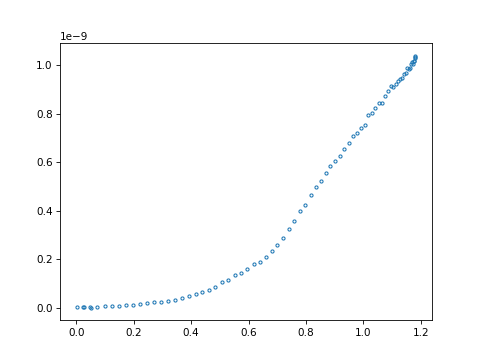

..\..\_jjtools\JJ_data_processing.py:361: RankWarning: Polyfit may be poorly conditioned
  R0, b = np.polyfit (  Is[n_sl] , Vs[n_sl], 1 )


no points in cut range
no points in cut range
no points in cut range
no points in cut range
no points in cut range
no points in cut range
no points in cut range
no points in cut range
Starting experimental run with id: 1097


1097

In [12]:
fig, ax = plt.subplots()

jj70N7 = JJmeas(sample = 'D070B1N7')
jj70N7.db_connect()

jj70N7.ZF = 4e-6
jj70N7.FF = 224e-6


B_list = np.linspace(4e-6, 254e-6, 85)
cos_list = abs (jj70N7.B_to_cos(B_list))

ids = range(208, 292+1)



Ics = [1*extract_Isw_R0_by_id (idx, dy = 50e-6, yoff = -.735e-3)[0] for idx in ids]

Ej0 = 1.18
ax.plot(Ej0*cos_list, Ics, '.', fillstyle = 'none')


Isw_param = Parameter(name = 'Isw', label = 'Switching current',
                      unit = 'A') 

cos_param = Parameter(name = 'cos', label = 'cos',
                      unit = '')

Ej_param = Parameter(name = 'Ej', label = 'Ej',
                      unit = 'K')

jj70N7.mock_meas((Isw_param, Ics), (Ej_param, Ej0*cos_list),
             label = 'Isw vs Ej')




### T scan

In [135]:
htr.HTRset('3.16mA')

'Heater changed = 3.16mA'

In [35]:
htr.output_range('3.16mA')

In [33]:
T8.get()

0.0344948

In [51]:
B = jj5.cos_to_B(0.2)
# B = 0e-6

print(B*1e3)

Bfield.set(B)

T_list = np.array( [40 + 10*i for i in range (17) ] )*1e-3

[            jj.IVC_udu (amp = 20e-12, stp = 0.2e-12, dt = .1,  N_avg = 1)
 
 for jj in   jj5.Tscan( T_list )]

htr_setpt.set(0.030)

0.19154216771905513


ramping T8 to 40.0 mK...
40.7 m
40.6 m
40.7 m
40.7 m
40.5 m
40.6 m
40.5 m
40.2 m
40.5 m
40.1 m
40.3 m
40.2 m
40.2 m
40.1 m
40.0 m
39.9 m
39.8 m
39.8 m
39.9 m
39.9 m
T is set


Starting experimental run with id: 1473
ramping T8 to 50.0 mK...
51.0 m
51.0 m
50.8 m
50.6 m
50.8 m
50.8 m
50.8 m
50.6 m
50.5 m
50.7 m
50.6 m
50.6 m
50.4 m
50.4 m
50.1 m
50.2 m
50.0 m
50.1 m
50.0 m
49.9 m
50.1 m
49.9 m
T is set


Starting experimental run with id: 1474
ramping T8 to 60.0 mK...
60.4 m
61.1 m
60.0 m
58.9 m
59.1 m
60.1 m
61.1 m
60.6 m
60.4 m
59.7 m
59.1 m
59.3 m
60.6 m
61.0 m
60.3 m
59.5 m
59.3 m
59.3 m
58.8 m
59.7 m
60.4 m
61.0 m
60.7 m
59.8 m
59.1 m
59.0 m
59.4 m
59.6 m
60.2 m
60.3 m
60.4 m
60.2 m
59.8 m
59.5 m
59.2 m
60.0 m
60.0 m
61.2 m
60.9 m
60.6 m
59.5 m
59.6 m
T is set


Starting experimental run with id: 1475
ramping T8 to 70.0 mK...
69.4 m
68.8 m
69.0 m
70.7 m
71.3 m
71.1 m
70.3 m
69.3 m
68.9 m
69.7 m
70.2 m
71.2 m
70.8 m
70.2 m
69.6 m
69.1 m
69.2 m
70.5 m
70.8 m
70.6 m
70.4 m
69.5 m
69.4 m
69.7 m
T is set


Starting experimental run with id: 1476
ramping T8 to 80.0 mK...
81.4 m
81.6 m
80.4 m
79.0 m
78.5 m
79.6 m
81.0 m
81.3 m
80.2 m
79.1 m
78.8 m
80.1 m
81.1 m
80.8 m
80.8 m
79.6 m
79.9 m
80.2 m
80.7 m
80.2 m
79.9 m
80.1 m
T is set


Starting experimental run with id: 1477
ramping T8 to 90.0 mK...
90.9 m
89.6 m
89.6 m
90.2 m
89.7 m
90.1 m
90.0 m
89.6 m
90.5 m
90.2 m
89.7 m
90.2 m
90.8 m
90.4 m
89.5 m
89.6 m
90.6 m
89.9 m
90.1 m
89.9 m
T is set


Starting experimental run with id: 1478
ramping T8 to 100.0 mK...
101.2 m
100.9 m
99.2 m
100.2 m
100.4 m
101.4 m
100.8 m
100.0 m
99.7 m
99.8 m
99.8 m
100.7 m
101.0 m
99.8 m
100.8 m
99.3 m
100.1 m
99.2 m
99.4 m
100.7 m
T is set


Starting experimental run with id: 1479
ramping T8 to 110.0 mK...
110.6 m
109.8 m
110.7 m
110.0 m
109.4 m
111.4 m
110.8 m
111.5 m
109.7 m
109.5 m
111.4 m
110.1 m
109.5 m
110.1 m
109.8 m
110.5 m
111.0 m
109.7 m
110.2 m
110.1 m
T is set


Starting experimental run with id: 1480
ramping T8 to 120.0 mK...
120.6 m
120.2 m
120.8 m
119.3 m
120.5 m
121.2 m
121.4 m
120.3 m
121.3 m
119.7 m
119.2 m
119.2 m
119.7 m
120.0 m
119.5 m
120.3 m
120.8 m
121.1 m
119.6 m
119.3 m
T is set


Starting experimental run with id: 1481
ramping T8 to 130.0 mK...
128.6 m
130.4 m
129.7 m
131.5 m
130.0 m
131.2 m
129.1 m
130.2 m
130.6 m
130.8 m
131.1 m
129.9 m
129.4 m
130.7 m
131.6 m
128.6 m
131.8 m
129.5 m
130.2 m
128.9 m
T is set


Starting experimental run with id: 1482
ramping T8 to 140.0 mK...
141.6 m
140.2 m
141.4 m
139.7 m
141.1 m
139.9 m
140.8 m
140.3 m
141.4 m
140.3 m
141.6 m
140.3 m
139.7 m
140.2 m
139.4 m
139.8 m
140.8 m
138.7 m
139.8 m
141.1 m
T is set


Starting experimental run with id: 1483
ramping T8 to 150.0 mK...
151.2 m
151.3 m
150.9 m
150.8 m
151.0 m
149.5 m
150.0 m
152.1 m
149.1 m
150.5 m
151.3 m
150.3 m
149.7 m
150.5 m
150.6 m
149.0 m
150.4 m
148.6 m
152.8 m
150.5 m
T is set


Starting experimental run with id: 1484
ramping T8 to 160.0 mK...
162.1 m
160.8 m
161.4 m
162.2 m
163.0 m
161.6 m
160.2 m
158.9 m
160.8 m
161.0 m
160.0 m
161.4 m
161.5 m
159.5 m
161.1 m
158.9 m
159.4 m
160.4 m
159.7 m
159.4 m
T is set


Starting experimental run with id: 1485
ramping T8 to 170.0 mK...
170.5 m
171.8 m
171.8 m
171.4 m
172.8 m
171.4 m
171.5 m
170.8 m
170.1 m
172.5 m
169.8 m
171.1 m
168.9 m
170.3 m
171.0 m
169.0 m
170.6 m
170.2 m
169.5 m
170.6 m
169.3 m
T is set


Starting experimental run with id: 1486
ramping T8 to 180.0 mK...
182.8 m
183.2 m
182.0 m
181.1 m
181.1 m
181.5 m
181.8 m
180.0 m
180.8 m
181.0 m
178.9 m
183.4 m
180.8 m
180.9 m
179.2 m
180.8 m
182.7 m
180.7 m
179.2 m
178.8 m
T is set


Starting experimental run with id: 1487
ramping T8 to 190.0 mK...
191.8 m
190.1 m
191.7 m
192.6 m
191.4 m
188.2 m
191.0 m
192.0 m
191.9 m
192.5 m
191.3 m
190.7 m
189.8 m
190.1 m
191.2 m
189.2 m
188.5 m
190.6 m
191.1 m
190.3 m
T is set


Starting experimental run with id: 1488
ramping T8 to 200.0 mK...
203.3 m
202.1 m
202.3 m
202.8 m
202.0 m
202.7 m
201.5 m
201.3 m
201.2 m
200.4 m
200.7 m
200.2 m
200.4 m
199.6 m
198.4 m
201.6 m
201.6 m
200.7 m
203.2 m
198.8 m
T is set


Starting experimental run with id: 1489



In [52]:
B = jj5.cos_to_B(0.3)
# B = 0e-6

print(B*1e3)

Bfield.set(B)

T_list = np.array( [40 + 10*i for i in range (17) ] )*1e-3

[            jj.IVC_udu (amp = 20e-12, stp = 0.2e-12, dt = .1,  N_avg = 1)
 
 for jj in   jj5.Tscan( T_list )]

htr_setpt.set(0.030)

0.17693791229481884


ramping T8 to 40.0 mK...
40.7 m
40.8 m
40.8 m
40.8 m
40.7 m
40.6 m
40.6 m
40.6 m
40.6 m
40.6 m
40.4 m
40.3 m
40.5 m
40.4 m
40.4 m
40.3 m
40.2 m
40.1 m
40.0 m
40.1 m
40.1 m
40.1 m
39.9 m
40.0 m
T is set


Starting experimental run with id: 1490
ramping T8 to 50.0 mK...
50.9 m
50.8 m
50.8 m
50.3 m
50.7 m
51.0 m
50.6 m
50.4 m
50.2 m
50.1 m
50.1 m
50.1 m
49.9 m
50.3 m
50.2 m
49.8 m
49.9 m
49.7 m
49.7 m
49.8 m
T is set


Starting experimental run with id: 1491
ramping T8 to 60.0 mK...
60.6 m
61.2 m
60.1 m
59.4 m
59.1 m
58.8 m
59.6 m
61.1 m
60.4 m
59.9 m
59.2 m
59.2 m
59.0 m
60.1 m
60.8 m
60.8 m
61.1 m
60.3 m
59.5 m
59.4 m
58.9 m
59.3 m
60.0 m
60.7 m
61.0 m
60.4 m
60.5 m
59.9 m
58.9 m
58.9 m
59.6 m
T is set


Starting experimental run with id: 1492
ramping T8 to 70.0 mK...
69.6 m
68.8 m
68.6 m
70.6 m
71.3 m
70.7 m
69.9 m
69.0 m
68.8 m
70.1 m
71.2 m
70.9 m
70.4 m
69.7 m
68.9 m
69.3 m
70.1 m
70.6 m
69.6 m
70.1 m
70.0 m
69.5 m
70.2 m
69.9 m
70.1 m
69.9 m
T is set


Starting experimental run with id: 1493
ramping T8 to 80.0 mK...
78.6 m
81.2 m
81.4 m
80.1 m
78.7 m
78.7 m
80.1 m
80.2 m
80.4 m
80.3 m
79.6 m
79.6 m
79.9 m
80.2 m
80.3 m
80.1 m
79.9 m
79.9 m
78.9 m
80.3 m
80.5 m
80.4 m
T is set


Starting experimental run with id: 1494
ramping T8 to 90.0 mK...
90.7 m
90.2 m
90.2 m
90.0 m
89.7 m
91.0 m
90.3 m
89.4 m
89.8 m
89.7 m
89.8 m
89.9 m
90.4 m
89.8 m
90.3 m
90.2 m
89.6 m
90.7 m
89.6 m
90.3 m
T is set


Starting experimental run with id: 1495
ramping T8 to 100.0 mK...
100.7 m
100.5 m
100.3 m
100.4 m
100.0 m
100.4 m
100.5 m
101.1 m
100.7 m
99.5 m
100.3 m
100.1 m
99.4 m
99.9 m
100.2 m
99.9 m
100.6 m
100.2 m
100.0 m
99.7 m
T is set


Starting experimental run with id: 1496
ramping T8 to 110.0 mK...
110.9 m
110.2 m
109.7 m
110.1 m
110.8 m
109.7 m
109.9 m
110.1 m
110.0 m
110.2 m
110.1 m
109.3 m
110.5 m
109.2 m
110.4 m
109.9 m
110.2 m
110.1 m
110.1 m
111.5 m
T is set


Starting experimental run with id: 1497
ramping T8 to 120.0 mK...
120.5 m
119.1 m
121.6 m
121.8 m
120.8 m
121.1 m
120.6 m
120.3 m
120.8 m
120.6 m
120.6 m
121.4 m
119.9 m
120.8 m
119.1 m
120.0 m
120.8 m
119.6 m
120.2 m
120.8 m
T is set


Starting experimental run with id: 1498
ramping T8 to 130.0 mK...
131.3 m
130.3 m
131.2 m
131.2 m
129.5 m
131.0 m
129.4 m
130.6 m
128.9 m
129.7 m
131.0 m
129.8 m
130.2 m
130.6 m
130.3 m
129.7 m
129.8 m
129.5 m
129.5 m
131.1 m
T is set


Starting experimental run with id: 1499
ramping T8 to 140.0 mK...
140.7 m
141.0 m
141.2 m
140.2 m
141.9 m
140.0 m
140.7 m
138.9 m
140.4 m
139.9 m
141.4 m
140.4 m
142.7 m
140.0 m
139.7 m
140.7 m
139.5 m
139.6 m
139.7 m
139.1 m
T is set


Starting experimental run with id: 1500
ramping T8 to 150.0 mK...
151.4 m
150.7 m
150.8 m
149.8 m
150.4 m
148.3 m
150.6 m
149.0 m
150.7 m
150.5 m
152.7 m
149.9 m
151.5 m
151.9 m
147.8 m
149.1 m
148.8 m
149.7 m
150.8 m
151.0 m
T is set


Starting experimental run with id: 1501
ramping T8 to 160.0 mK...
161.7 m
161.6 m
161.4 m
159.2 m
159.9 m
160.8 m
161.8 m
161.2 m
160.8 m
160.5 m
160.7 m
159.6 m
160.1 m
160.4 m
159.3 m
159.0 m
159.0 m
161.3 m
160.2 m
159.2 m
T is set


Starting experimental run with id: 1502
ramping T8 to 170.0 mK...
173.2 m
170.4 m
170.5 m
170.3 m
170.3 m
171.6 m
168.9 m
169.4 m
171.0 m
169.7 m
170.4 m
171.9 m
170.1 m
169.7 m
171.0 m
169.5 m
168.9 m
170.8 m
170.0 m
169.0 m
T is set


Starting experimental run with id: 1503
ramping T8 to 180.0 mK...
181.5 m
181.1 m
183.3 m
182.7 m
179.4 m
181.7 m
179.7 m
182.8 m
181.1 m
179.8 m
180.9 m
181.0 m
180.9 m
181.0 m
180.4 m
177.8 m
178.5 m
180.2 m
181.3 m
180.8 m
178.4 m
180.5 m
180.5 m
T is set


Starting experimental run with id: 1504
ramping T8 to 190.0 mK...
191.6 m
192.9 m
191.5 m
192.3 m
190.0 m
191.3 m
192.6 m
193.0 m
191.6 m
191.5 m
190.5 m
191.7 m
191.5 m
191.8 m
190.6 m
191.1 m
189.4 m
190.8 m
191.5 m
186.6 m
191.3 m
190.5 m
T is set


Starting experimental run with id: 1505
ramping T8 to 200.0 mK...
201.3 m
203.3 m
201.3 m
203.6 m
198.8 m
201.0 m
202.2 m
200.2 m
201.6 m
200.7 m
198.9 m
201.6 m
199.0 m
200.0 m
201.4 m
200.9 m
199.4 m
200.1 m
199.4 m
200.6 m
198.4 m
201.9 m
T is set


Starting experimental run with id: 1506



In [ ]:
[            jj.IVC_fwd (amp = 1e-12, stp = 0.025e-12, dt = .5, N_avg = 100)
for jj in    jj.Tscan( [200e-3] )]

htr.set(0.030)

In [36]:
np.array( [40 + 10*i for i in range (17) ] )*1e-3

array([0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11, 0.12, 0.13, 0.14,
       0.15, 0.16, 0.17, 0.18, 0.19, 0.2 ])

In [44]:
htr_setpt.set(30e-3)

In [13]:
htr.output_range('3.16mA')

In [28]:
T_list = np.array( [50 + 25*i for i in range (11) ] )*1e-3
B_list = np.linspace(0, 1.85e-3, 11)

for jj in  jj.Tscan( T_list ):
    
    for jj in jj.Bscan(B_list):
    
        jj.IVC_udu (amp = 1e-12, stp = 0.01e-12, dt = .5, Ioff = -.5e-12)
    
    
Bfield.set(0e-3)
htr_setpt.set(30e-3)

ramping T8 to 50.0 mK...
50.9 m
50.7 m
50.7 m
50.9 m
51.0 m
50.5 m
50.5 m
50.3 m
50.6 m
50.2 m
50.2 m
50.2 m
49.9 m
49.6 m
49.8 m
50.1 m
50.0 m
49.6 m
49.7 m
49.5 m
49.7 m
49.6 m
T is set


Starting experimental run with id: 912


Starting experimental run with id: 913


Starting experimental run with id: 914


Starting experimental run with id: 915


Starting experimental run with id: 916


Starting experimental run with id: 917


Starting experimental run with id: 918


Starting experimental run with id: 919


Starting experimental run with id: 920


Starting experimental run with id: 921


Starting experimental run with id: 922

{ 'ids' : range(912,922+1), 'B' : np.linspace(0.00e+00,1.85e-03, 11), 'T' : 0.050, 'comm : '' }
ramping T8 to 75.0 mK...


VisaIOError: ('VI_ERROR_TMO (-1073807339): Timeout expired before operation completed.', "asking 'RDGK? 8\\n\\r' to <Model_372: LS370 input Ch>", 'getting LS370 input Ch_ch08_temperature')

In [ ]:
T_list = np.array( [200 + 25*i for i in range (5) ] )*1e-3
B_list = np.linspace(0, 1.85e-3, 11)

for jj in  jj.Tscan( T_list ):
    
    for jj in jj.Bscan(B_list):
    
        jj.IVC_fwd (amp = 2e-12, stp = 0.04e-12, dt = .5, Ioff = -.35e-12)
    
    
Bfield.set(0e-3)
htr_setpt.set(30e-3)

## Snapshot

In [778]:
station.snapshot()

{'instruments': {'K6220': {'functions': {},
   'submodules': {},
   '__class__': 'qcodes.instrument_drivers.Keithley.Keithley_6220_Isrc.Keithley_6220_Isrc',
   'parameters': {'IDN': {'value': {'vendor': 'KEITHLEY INSTRUMENTS INC.',
      'model': '6220',
      'serial': '1249187',
      'firmware': 'A05  /700x'},
     'ts': '2020-07-22 15:02:02',
     'raw_value': {'vendor': 'KEITHLEY INSTRUMENTS INC.',
      'model': '6220',
      'serial': '1249187',
      'firmware': 'A05  /700x'},
     '__class__': 'qcodes.instrument.parameter.Parameter',
     'full_name': 'K6220_IDN',
     'label': 'IDN',
     'name': 'IDN',
     'instrument': 'qcodes.instrument_drivers.Keithley.Keithley_6220_Isrc.Keithley_6220_Isrc',
     'instrument_name': 'K6220',
     'inter_delay': 0,
     'post_delay': 0,
     'unit': '',
     'vals': '<Anything>'},
    'timeout': {'value': 10.0,
     'ts': '2020-07-27 13:33:51',
     'raw_value': 10.0,
     '__class__': 'qcodes.instrument.parameter.Parameter',
     'full_na

In [784]:
snap=station.snapshot()

In [904]:
snap['instruments']['K6220']['parameters']['IDN']['__class__']

'qcodes.instrument.parameter.Parameter'

In [890]:
from JJmeasurement_Plamen import *
import QCmeasurement_Plamen

In [891]:
jjmock=JJmeas_Pl(sample='mock',tools=tools)

In [906]:
x=np.linspace(-np.pi,np.pi)
y=np.sin(x)
V=Parameter('V')
I=Parameter('I')
dataset=jjmock.mock_meas_P((V,y),(I,x))

Starting experimental run with id: 17


<IPython.core.display.Javascript object>


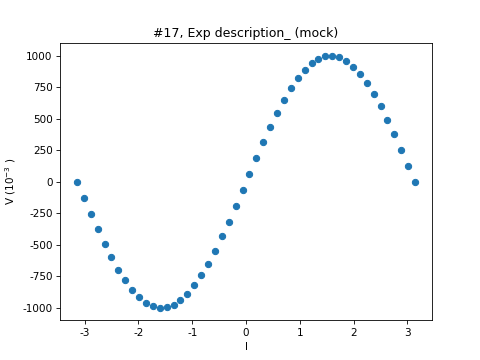

In [907]:
jjmock.pbi(17)

In [905]:
dataset1=dataset.snapshot

In [908]:
dataset2=dataset.snapshot

In [909]:
from qcodes.utils.metadata import diff_param_values



In [910]:
diff_param_values(dataset1, dataset2).changed


{}